In [1]:
import cv2
import itertools
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

In [5]:

mp_face_detection = mp.solutions.face_detection


face_detection = mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5)


mp_drawing = mp.solutions.drawing_utils

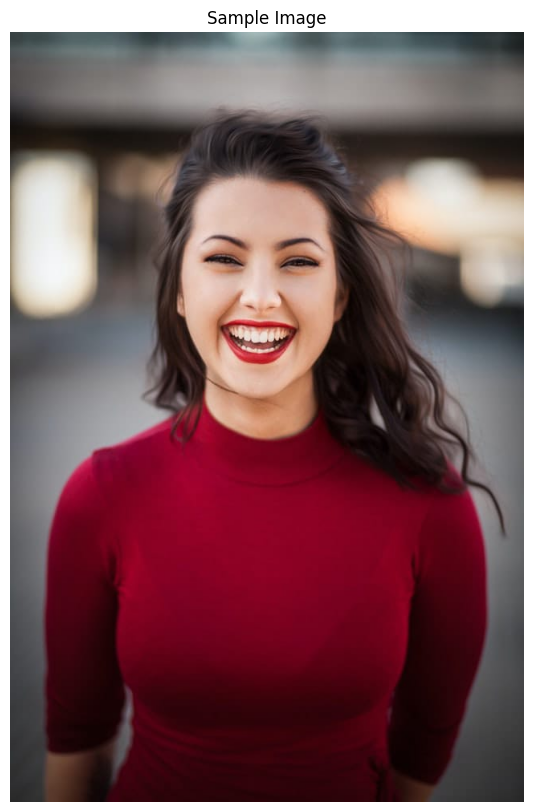

In [9]:

sample_img = cv2.imread("C:\\Users\\DELL\\Desktop\\img1.jpg")


plt.figure(figsize = [10, 10])


plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

In [10]:

face_detection_results = face_detection.process(sample_img[:,:,::-1])


if face_detection_results.detections:

    for face_no, face in enumerate(face_detection_results.detections):
        
        print(f'FACE NUMBER: {face_no+1}')
        print('---------------------------------')

        print(f'FACE CONFIDENCE: {round(face.score[0], 2)}')
        
        face_data = face.location_data
     
        print(f'\nFACE BOUNDING BOX:\n{face_data.relative_bounding_box}')
        
        for i in range(2):

            print(f'{mp_face_detection.FaceKeyPoint(i).name}:')
            print(f'{face_data.relative_keypoints[mp_face_detection.FaceKeyPoint(i).value]}') 

FACE NUMBER: 1
---------------------------------
FACE CONFIDENCE: 0.94

FACE BOUNDING BOX:
xmin: 0.32581842
ymin: 0.251306
width: 0.3295294
height: 0.21968663

RIGHT_EYE:
x: 0.4228812
y: 0.30637407

LEFT_EYE:
x: 0.5637647
y: 0.30873197



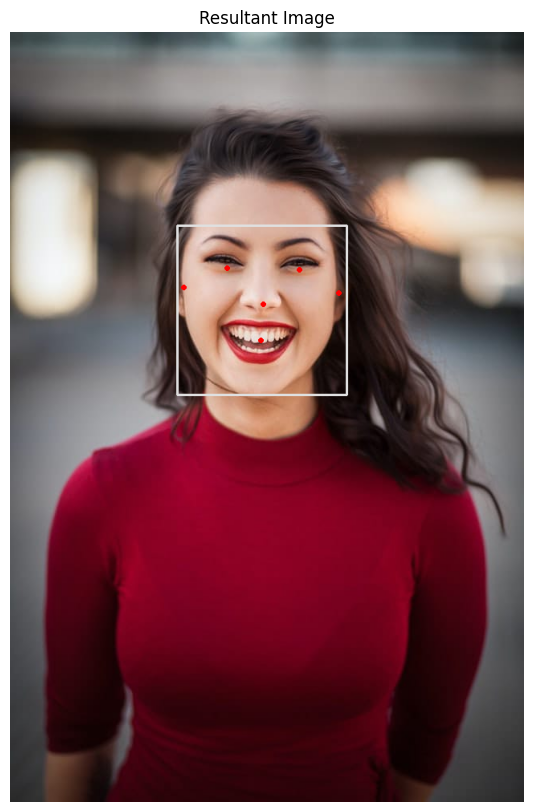

In [11]:

img_copy = sample_img[:,:,::-1].copy()

if face_detection_results.detections:
    
    for face_no, face in enumerate(face_detection_results.detections):
        
        mp_drawing.draw_detection(image=img_copy, detection=face, 
                                 keypoint_drawing_spec=mp_drawing.DrawingSpec(color=(255, 0, 0),
                                                                              thickness=2,
                                                                              circle_radius=2))

fig = plt.figure(figsize = [10, 10])

plt.title("Resultant Image");plt.axis('off');plt.imshow(img_copy);plt.show()

In [12]:

mp_face_mesh = mp.solutions.face_mesh

face_mesh_images = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=2,
                                         min_detection_confidence=0.5)

face_mesh_videos = mp_face_mesh.FaceMesh(static_image_mode=False, max_num_faces=1, 
                                         min_detection_confidence=0.5,min_tracking_confidence=0.3)

mp_drawing_styles = mp.solutions.drawing_styles

In [13]:

face_mesh_results = face_mesh_images.process(sample_img[:,:,::-1])

LEFT_EYE_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_LEFT_EYE)))
RIGHT_EYE_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_RIGHT_EYE)))

if face_mesh_results.multi_face_landmarks:
    
    for face_no, face_landmarks in enumerate(face_mesh_results.multi_face_landmarks):
    
        print(f'FACE NUMBER: {face_no+1}')
        print('-----------------------')
      
        print(f'LEFT EYE LANDMARKS:\n')

        for LEFT_EYE_INDEX in LEFT_EYE_INDEXES[:2]:
   
            print(face_landmarks.landmark[LEFT_EYE_INDEX])
       
        print(f'RIGHT EYE LANDMARKS:\n')
  
        for RIGHT_EYE_INDEX in RIGHT_EYE_INDEXES[:2]:

            print(face_landmarks.landmark[RIGHT_EYE_INDEX])

FACE NUMBER: 1
-----------------------
LEFT EYE LANDMARKS:

x: 0.5379442
y: 0.2981429
z: 0.0028535225

x: 0.54898554
y: 0.29635918
z: 0.0001301218

RIGHT EYE LANDMARKS:

x: 0.40850136
y: 0.29323074
z: 0.004987884

x: 0.39195964
y: 0.29712752
z: 0.019362481



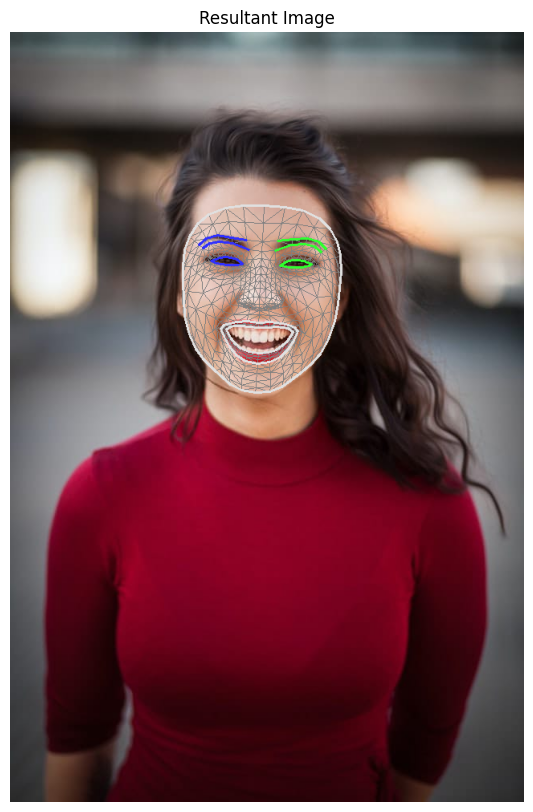

In [14]:

img_copy = sample_img[:,:,::-1].copy()

if face_mesh_results.multi_face_landmarks:

    for face_landmarks in face_mesh_results.multi_face_landmarks:

        mp_drawing.draw_landmarks(image=img_copy, 
                                  landmark_list=face_landmarks,connections=mp_face_mesh.FACEMESH_TESSELATION,
                                  landmark_drawing_spec=None, 
                                  connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())
  
        mp_drawing.draw_landmarks(image=img_copy, landmark_list=face_landmarks,connections=mp_face_mesh.FACEMESH_CONTOURS,
                                  landmark_drawing_spec=None, 
                                  connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())

fig = plt.figure(figsize = [10, 10])

plt.title("Resultant Image");plt.axis('off');plt.imshow(img_copy);plt.show()

In [15]:
def detectFacialLandmarks(image, face_mesh, display = True):

    results = face_mesh.process(image[:,:,::-1])
   
    output_image = image[:,:,::-1].copy()

    if results.multi_face_landmarks:

        for face_landmarks in results.multi_face_landmarks:

            mp_drawing.draw_landmarks(image=output_image, landmark_list=face_landmarks,
                                      connections=mp_face_mesh.FACEMESH_TESSELATION,
                                      landmark_drawing_spec=None, 
                                      connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())

            mp_drawing.draw_landmarks(image=output_image, landmark_list=face_landmarks,
                                      connections=mp_face_mesh.FACEMESH_CONTOURS,
                                      landmark_drawing_spec=None, 
                                      connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())

   
    if display:

        plt.figure(figsize=[15,15])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image);plt.title("Output");plt.axis('off');

    else:

        return np.ascontiguousarray(output_image[:,:,::-1], dtype=np.uint8), results              

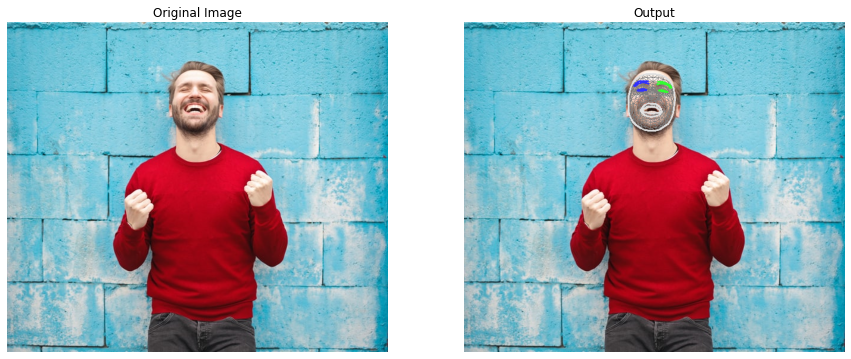

In [10]:

image = cv2.imread('media/sample1.jpg')
detectFacialLandmarks(image, face_mesh_images, display=True)

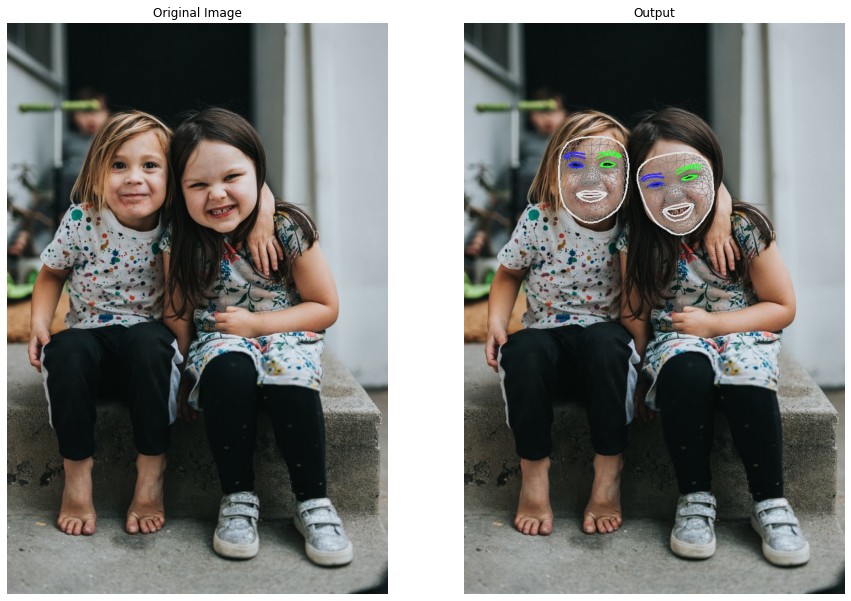

In [11]:

image = cv2.imread('media/sample2.jpg')
detectFacialLandmarks(image, face_mesh_images, display=True)

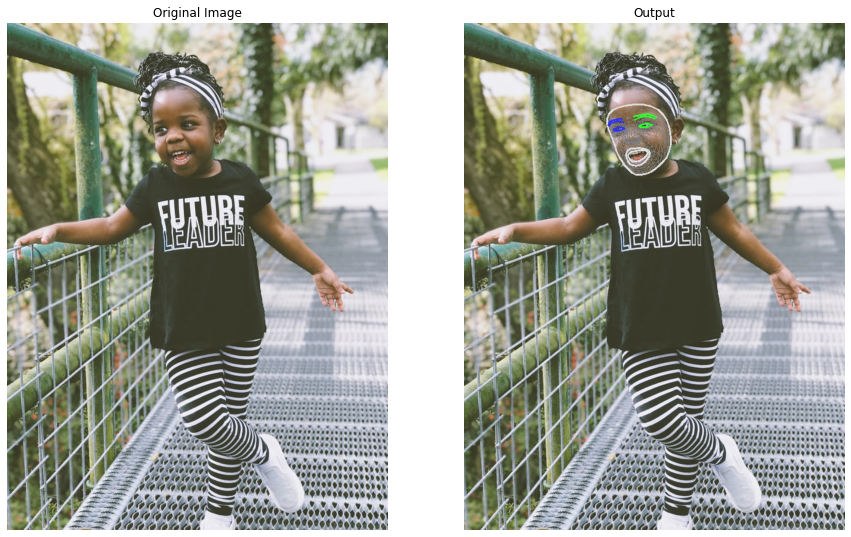

In [12]:
# Read another sample image and perform facial landmarks detection on it.
image = cv2.imread('media/sample3.jpg')
detectFacialLandmarks(image, face_mesh_images, display=True)

In [16]:

camera_video = cv2.VideoCapture(0)
camera_video.set(3,1280)
camera_video.set(4,960)

cv2.namedWindow('Face Landmarks Detection', cv2.WINDOW_NORMAL)


time1 = 0


while camera_video.isOpened():

    ok, frame = camera_video.read()
    
  
    if not ok:
        continue
  
    frame = cv2.flip(frame, 1)
  
    frame, _ = detectFacialLandmarks(frame, face_mesh_videos, display=False)

    time2 = time()
  
    if (time2 - time1) > 0:
    
        frames_per_second = 1.0 / (time2 - time1)
        
        # Write the calculated number of frames per second on the frame. 
        cv2.putText(frame, 'FPS: {}'.format(int(frames_per_second)), (10, 30),
                    cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 3)

    time1 = time2
    
    # Display the frame.
    cv2.imshow('Face Landmarks Detection', frame)
 
    k = cv2.waitKey(1) & 0xFF    
    
    if(k == 27):
        break
               
camera_video.release()
cv2.destroyAllWindows()

In [17]:
def getSize(image, face_landmarks, INDEXES):
   
    image_height, image_width, _ = image.shape
  
    INDEXES_LIST = list(itertools.chain(*INDEXES))
 
    landmarks = []
  
    for INDEX in INDEXES_LIST:
  
        landmarks.append([int(face_landmarks.landmark[INDEX].x * image_width),
                               int(face_landmarks.landmark[INDEX].y * image_height)])

    _, _, width, height = cv2.boundingRect(np.array(landmarks))
    
    landmarks = np.array(landmarks)
    
    return width, height, landmarks

In [18]:
def isOpen(image, face_mesh_results, face_part, threshold=5, display=True):
 
    
    image_height, image_width, _ = image.shape
 
    output_image = image.copy()
    
    status={}

    if face_part == 'MOUTH':
  
        INDEXES = mp_face_mesh.FACEMESH_LIPS
 
        loc = (10, image_height - image_height//40)
        
        increment=-30

    elif face_part == 'LEFT EYE':
 
        INDEXES = mp_face_mesh.FACEMESH_LEFT_EYE
        
        # Specify the location to write the is left eye open status.
        loc = (10, 30)
        increment=30
    
    # Check if the face part is right eye.    
    elif face_part == 'RIGHT EYE':
        
        # Get the indexes of the right eye.
        INDEXES = mp_face_mesh.FACEMESH_RIGHT_EYE 
        
        # Specify the location to write the is right eye open status.
        loc = (image_width-300, 30)
  
        increment=30

    else:
        return
    
    # Iterate over the found faces.
    for face_no, face_landmarks in enumerate(face_mesh_results.multi_face_landmarks):
        
         # Get the height of the face part.
        _, height, _ = getSize(image, face_landmarks, INDEXES)
        
         # Get the height of the whole face.
        _, face_height, _ = getSize(image, face_landmarks, mp_face_mesh.FACEMESH_FACE_OVAL)
        
        # Check if the face part is open.
        if (height/face_height)*100 > threshold:
            
            # Set status of the face part to open.
            status[face_no] = 'OPEN'
 
            color=(0,255,0)
        
        # Otherwise.
        else:

            status[face_no] = 'CLOSE'
   
            color=(0,0,255)
        
        # Write the face part isOpen status on the output image at the appropriate location.
        cv2.putText(output_image, f'FACE {face_no+1} {face_part} {status[face_no]}.', 
                    (loc[0],loc[1]+(face_no*increment)), cv2.FONT_HERSHEY_PLAIN, 1.4, color, 2)
                
    # Check if the output image is specified to be displayed.
    if display:

        # Display the output image.
        plt.figure(figsize=[10,10])
        plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
    
    # Otherwise
    else:
        
        # Return the output image and the isOpen statuses of the face part of each detected face.
        return output_image, status

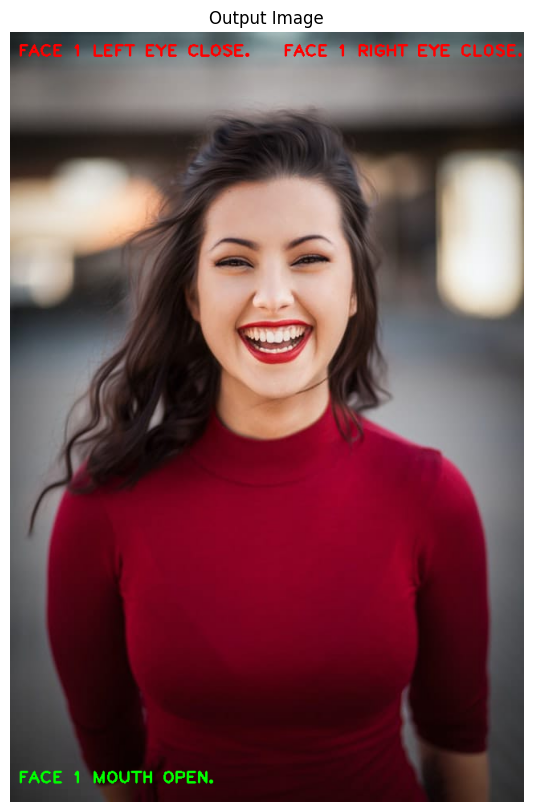

In [21]:
# Read another sample image and perform facial expression recognition on it.
image = cv2.imread("C:\\Users\\DELL\\Desktop\\img1.jpg")
image = cv2.flip(image, 1)
_, face_mesh_results = detectFacialLandmarks(image, face_mesh_images, display=False)
if face_mesh_results.multi_face_landmarks:
    output_image, _ = isOpen(image, face_mesh_results, 'MOUTH', threshold=15, display=False)
    output_image, _ = isOpen(output_image, face_mesh_results, 'LEFT EYE', threshold=5, display=False)
    isOpen(output_image, face_mesh_results, 'RIGHT EYE', threshold=5)

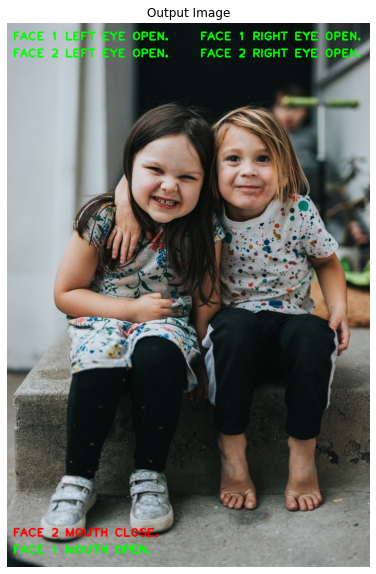

In [17]:
# Read another sample image and perform facial expression recognition on it.
image = cv2.imread('media/sample2.jpg')
image = cv2.flip(image, 1)
_, face_mesh_results = detectFacialLandmarks(image, face_mesh_images, display=False)
if face_mesh_results.multi_face_landmarks:
    output_image, _ = isOpen(image, face_mesh_results, 'MOUTH', threshold=15, display=False)
    output_image, _ = isOpen(output_image, face_mesh_results, 'LEFT EYE', threshold=5, display=False)
    isOpen(output_image, face_mesh_results, 'RIGHT EYE', threshold=5)

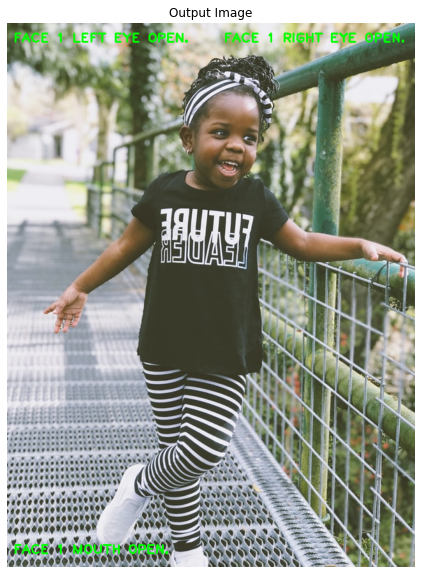

In [18]:
# Read another sample image and perform facial expression recognition on it.
image = cv2.imread('media/sample3.jpg')
image = cv2.flip(image, 1)
_, face_mesh_results = detectFacialLandmarks(image, face_mesh_images, display=False)
if face_mesh_results.multi_face_landmarks:
    output_image, _ = isOpen(image, face_mesh_results, 'MOUTH', threshold=15, display=False)
    output_image, _ = isOpen(output_image, face_mesh_results, 'LEFT EYE', threshold=5, display=False)
    isOpen(output_image, face_mesh_results, 'RIGHT EYE', threshold=5)

In [23]:
def overlay(image, filter_img, face_landmarks, face_part, INDEXES, display=True):
  
    annotated_image = image.copy()

    try:
  
        filter_img_height, filter_img_width, _  = filter_img.shape
        _, face_part_height, landmarks = getSize(image, face_landmarks, INDEXES)

        required_height = int(face_part_height*2.5)
 
        resized_filter_img = cv2.resize(filter_img, (int(filter_img_width*
                                                         (required_height/filter_img_height)),
                                                     required_height))

        filter_img_height, filter_img_width, _  = resized_filter_img.shape

        # Convert the image to grayscale and apply the threshold to get the mask image.
        _, filter_img_mask = cv2.threshold(cv2.cvtColor(resized_filter_img, cv2.COLOR_BGR2GRAY),
                                           25, 255, cv2.THRESH_BINARY_INV)

        # Calculate the center of the face part.
        center = landmarks.mean(axis=0).astype("int")

        # Check if the face part is mouth.
        if face_part == 'MOUTH':
 
            location = (int(center[0] - filter_img_width / 3), int(center[1]))

        # Otherwise if the face part is an eye.
        else:

            # Calculate the location where the eye filter image will be placed.  
            location = (int(center[0]-filter_img_width/2), int(center[1]-filter_img_height/2))

        # Retrieve the region of interest from the image where the filter image will be placed.
        ROI = image[location[1]: location[1] + filter_img_height,
                    location[0]: location[0] + filter_img_width]


        resultant_image = cv2.bitwise_and(ROI, ROI, mask=filter_img_mask)

 
        resultant_image = cv2.add(resultant_image, resized_filter_img)

        # Update the image's region of interest with resultant image.
        annotated_image[location[1]: location[1] + filter_img_height,
                        location[0]: location[0] + filter_img_width] = resultant_image
            
    # Catch and handle the error(s).
    except Exception as e:
        pass
    
    # Check if the annotated image is specified to be displayed.
    if display:

        # Display the annotated image.
        plt.figure(figsize=[10,10])
        plt.imshow(annotated_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
    
    # Otherwise
    else:
            
        # Return the annotated image.
        return annotated_image

In [25]:
# Initialize the VideoCapture object to read from the webcam.
camera_video = cv2.VideoCapture(0)
camera_video.set(3,1280)
camera_video.set(4,960)

# Create named window for resizing purposes.
cv2.namedWindow('Face Filter', cv2.WINDOW_NORMAL)

# Read the left and right eyes images.
left_eye = cv2.imread('media/left_eye.png')
right_eye = cv2.imread('media/right_eye.png')

# Initialize the VideoCapture object to read from the smoke animation video stored in the disk.
smoke_animation = cv2.VideoCapture('media/smoke_animation.mp4')

# Set the smoke animation video frame counter to zero.
smoke_frame_counter = 0

# Iterate until the webcam is accessed successfully.
while camera_video.isOpened():
    
    # Read a frame.
    ok, frame = camera_video.read()
    
    # Check if frame is not read properly then continue to the next iteration to read
    # the next frame.
    if not ok:
        continue
        
    # Read a frame from smoke animation video
    _, smoke_frame = smoke_animation.read()
    
    # Increment the smoke animation video frame counter.
    smoke_frame_counter += 1
    
    # Check if the current frame is the last frame of the smoke animation video.
    if smoke_frame_counter == smoke_animation.get(cv2.CAP_PROP_FRAME_COUNT):     
        
        # Set the current frame position to first frame to restart the video.
        smoke_animation.set(cv2.CAP_PROP_POS_FRAMES, 0)
        
        # Set the smoke animation video frame counter to zero.
        smoke_frame_counter = 0
    
    # Flip the frame horizontally for natural (selfie-view) visualization.
    frame = cv2.flip(frame, 1)
    
    # Perform Face landmarks detection.
    _, face_mesh_results = detectFacialLandmarks(frame, face_mesh_videos, display=False)
    
    # Check if facial landmarks are found.
    if face_mesh_results.multi_face_landmarks:
        
        # Get the mouth isOpen status of the person in the frame.
        _, mouth_status = isOpen(frame, face_mesh_results, 'MOUTH', 
                                     threshold=15, display=False)
        
        # Get the left eye isOpen status of the person in the frame.
        _, left_eye_status = isOpen(frame, face_mesh_results, 'LEFT EYE', 
                                        threshold=4.5 , display=False)
        
        # Get the right eye isOpen status of the person in the frame.
        _, right_eye_status = isOpen(frame, face_mesh_results, 'RIGHT EYE', 
                                         threshold=4.5, display=False)
        
        # Iterate over the found faces.
        for face_num, face_landmarks in enumerate(face_mesh_results.multi_face_landmarks):
            
            # Check if the left eye of the face is open.
            if left_eye_status[face_num] == 'OPEN':
                
                # Overlay the left eye image on the frame at the appropriate location.
                frame = overlay(frame, left_eye, face_landmarks,
                                'LEFT EYE', mp_face_mesh.FACEMESH_LEFT_EYE, display=False)
            
            # Check if the right eye of the face is open.
            if right_eye_status[face_num] == 'OPEN':
                
                # Overlay the right eye image on the frame at the appropriate location.
                frame = overlay(frame, right_eye, face_landmarks,
                                'RIGHT EYE', mp_face_mesh.FACEMESH_RIGHT_EYE, display=False)
            
            # Check if the mouth of the face is open.
            if mouth_status[face_num] == 'OPEN':
                
                # Overlay the smoke animation on the frame at the appropriate location.
                frame = overlay(frame, smoke_frame, face_landmarks, 
                                'MOUTH', mp_face_mesh.FACEMESH_LIPS, display=False)
    
    # Display the frame.
    cv2.imshow('Face Filter', frame)
    
    # Wait for 1ms. If a key is pressed, retreive the ASCII code of the key.
    k = cv2.waitKey(1) & 0xFF    
    
    # Check if 'ESC' is pressed and break the loop.
    if(k == 27):
        break

# Release the VideoCapture Object and close the windows.                  
camera_video.release()
cv2.destroyAllWindows()